**ANEMOMETER PROJECT CODE FILE:**

Author: Muntaha Pasha

**IMPORTS NEEDED**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import csv
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm

**READ IN SONIC DATA**

In [2]:
df_sonic = pd.read_csv('mlw-all.csv', encoding='utf-8')

In [3]:
df_sonic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93991973 entries, 0 to 93991972
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1   Dir       int64  
 2   Spd       float64
 3   Status    float64
 4   U         float64
 5   V         float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.2+ GB


**READ IN WXT DATA**

In [4]:
df_wxt = pd.read_csv('mlwxt-all.csv', encoding='utf-8')

In [5]:
df_wxt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704289 entries, 0 to 704288
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    704289 non-null  object 
 1   wdir        685890 non-null  float64
 2   wspd        685890 non-null  float64
 3   wspd_max    685890 non-null  float64
 4   tdry        704289 non-null  float64
 5   rh          704289 non-null  float64
 6   pres        704289 non-null  float64
 7   rain_accum  704289 non-null  float64
 8   batt        704289 non-null  float64
dtypes: float64(8), object(1)
memory usage: 48.4+ MB


**CHECKING SONIC/WXT FILES FOR VARIABLE NAMES/COLUMNS**

In [6]:
df_sonic.head()

,datetime,Dir,Spd,Status,U,V
0,2018-01-24T19:13:01.0522,4,1.76,60.0,-0.12277,-1.7557
1,2018-01-24T19:13:02.0527,359,1.90,60.0,0.03316,-1.8997
2,2018-01-24T19:13:03.0496,354,2.27,60.0,0.23728,-2.2576
3,2018-01-24T19:13:04.0508,346,1.77,60.0,0.42820,-1.7174
4,2018-01-24T19:13:05.0520,342,1.33,60.0,0.41099,-1.2649


In [7]:
df_wxt.head()

,datetime,wdir,wspd,wspd_max,tdry,rh,pres,rain_accum,batt
0,2014-04-04T15:23:46.9931,230.0,1.1,2.1,1.8,54.1,809.8,0.0,13.9
1,2014-04-04T15:28:46.9772,197.0,1.2,1.9,1.8,55.1,809.8,0.0,13.9
2,2014-04-04T15:33:46.9630,205.0,0.7,1.5,2.3,48.2,809.7,0.0,13.9
3,2014-04-04T15:38:46.9457,190.0,0.7,1.7,3.1,48.2,809.7,0.0,13.9
4,2014-04-04T15:43:46.9321,197.0,0.6,1.3,3.1,46.4,809.8,0.0,14.0


**SORTING WXT VALUES:**

We want to order this dataframe in descending order, putting all our max wind speeds at the top of the dataframe. It will go from greatest to least.

In [8]:
dfWXTSORT = df_wxt.sort_values('wspd', ascending=False)
dfWXTSORT.head(20)

,datetime,wdir,wspd,wspd_max,tdry,rh,pres,rain_accum,batt
570679,2019-10-11T15:02:46.8575,316.0,24.4,35.3,-1.0,31.9,814.0,220.5,13.9
169806,2015-11-18T14:29:53.6663,259.0,22.7,42.2,4.1,39.6,791.4,55.3,13.9
702444,2021-01-13T09:52:38.7046,270.0,22.4,33.6,10.2,22.0,806.3,0.2,13.9
169754,2015-11-18T10:09:53.8109,267.0,22.2,32.7,4.2,38.3,792.0,54.9,13.9
169753,2015-11-18T10:04:53.8176,262.0,22.2,31.6,4.3,38.1,792.1,54.9,13.9
169758,2015-11-18T10:29:53.8044,269.0,22.0,32.1,5.3,35.2,791.8,55.0,13.9
169755,2015-11-18T10:14:53.8100,271.0,21.8,31.9,4.8,37.0,791.9,55.0,13.9
702471,2021-01-13T12:07:38.5868,268.0,21.7,32.4,9.9,26.2,806.0,0.2,13.9
702463,2021-01-13T11:27:38.6189,266.0,21.6,30.1,9.4,25.0,806.1,0.2,13.9
169807,2015-11-18T14:34:53.6651,267.0,21.5,37.5,4.2,39.7,793.1,55.4,13.9


**GETTING THE TENTH PERCENTILE:**

Next thing we want to do is from our sorted Dataframe (Highest Wind Spds at Top, Lowest at Bottom), we want to take the top 10th percent of our data. So we specify how much of it we want to keep ($n$), and then we take that top 10%.

In [9]:
#Want top 10th percentile
n = 10
#Dataframe WXT Top Ten:
dfWXTTT = dfWXTSORT.head(int(len(dfWXTSORT)*(n/100)))
dfWXTTT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70428 entries, 570679 to 218008
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    70428 non-null  object 
 1   wdir        70428 non-null  float64
 2   wspd        70428 non-null  float64
 3   wspd_max    70428 non-null  float64
 4   tdry        70428 non-null  float64
 5   rh          70428 non-null  float64
 6   pres        70428 non-null  float64
 7   rain_accum  70428 non-null  float64
 8   batt        70428 non-null  float64
dtypes: float64(8), object(1)
memory usage: 5.4+ MB


**CHECKING FOR CORRECTNESS:**

One other way to make sure I took the Top Tenth of all WXT data is to plot my Top Ten Dataframe against the Full WXT Dataframe. $\checkmark$

Text(0.5, 1.0, 'Top Tenth Percentile for WXT vs. All WXT')

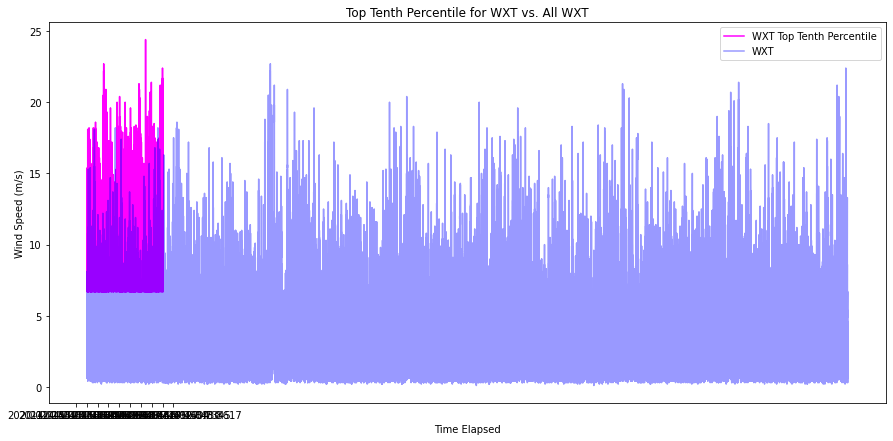

In [10]:
dfSWXT = dfWXTTT.sort_values('datetime', ascending=True)
ax = dfSWXT.plot(kind = 'line', x = 'datetime', y = 'wspd', color='magenta', figsize = (15, 7), label = "WXT Top Tenth Percentile")
df_wxt.plot(kind = 'line', x = 'datetime', y = 'wspd', color = 'blue', alpha = 0.4, figsize = (15, 7), ax = ax, label = "WXT")
ax.set_xlabel("Time Elapsed")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Top Tenth Percentile for WXT vs. All WXT")

The axis looks a little weird, but we can clearly see this is taking the top tenth of our max wind speed data for WXT. It's taking the top wind speeds that cover 10% of our full data. $\checkmark$

**AVERAGING WXT DATA (24-HOUR MEAN):**

Now let's try and smooth out our data and look at WXT data graphed over a period of a day. We know WXT files are in 5-minute intervals, and there are 288 5-minute intervals in the day. So we need to combine the mean over each consecutive $288$ data points to make one point for a day.

In [11]:
df_wxt['datetime'] =  pd.to_datetime(df_wxt['datetime'])
df_new = df_wxt.groupby(df_wxt.datetime.dt.date).mean()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2456 entries, 2014-04-04 to 2021-01-19
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wdir        2442 non-null   float64
 1   wspd        2442 non-null   float64
 2   wspd_max    2442 non-null   float64
 3   tdry        2456 non-null   float64
 4   rh          2456 non-null   float64
 5   pres        2456 non-null   float64
 6   rain_accum  2456 non-null   float64
 7   batt        2456 non-null   float64
dtypes: float64(8)
memory usage: 172.7+ KB


Text(0.5, 1.0, 'Daily Average for WXT')

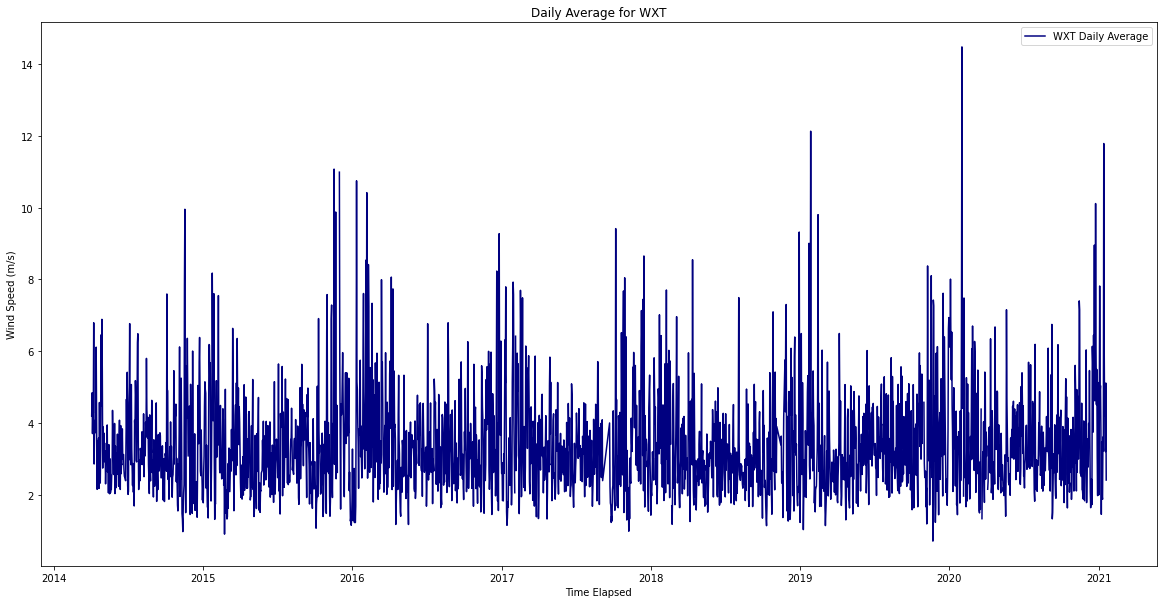

In [12]:
ax = df_new.plot(kind = 'line', y = 'wspd', color='navy', figsize = (20, 10), label = "WXT Daily Average")
ax.set_xlabel("Time Elapsed")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Daily Average for WXT")

**FULL WXT RECORD:**

Graphing all of the WXT Data we have.

Text(0.5, 1.0, 'WXT Data (2014-2021)')

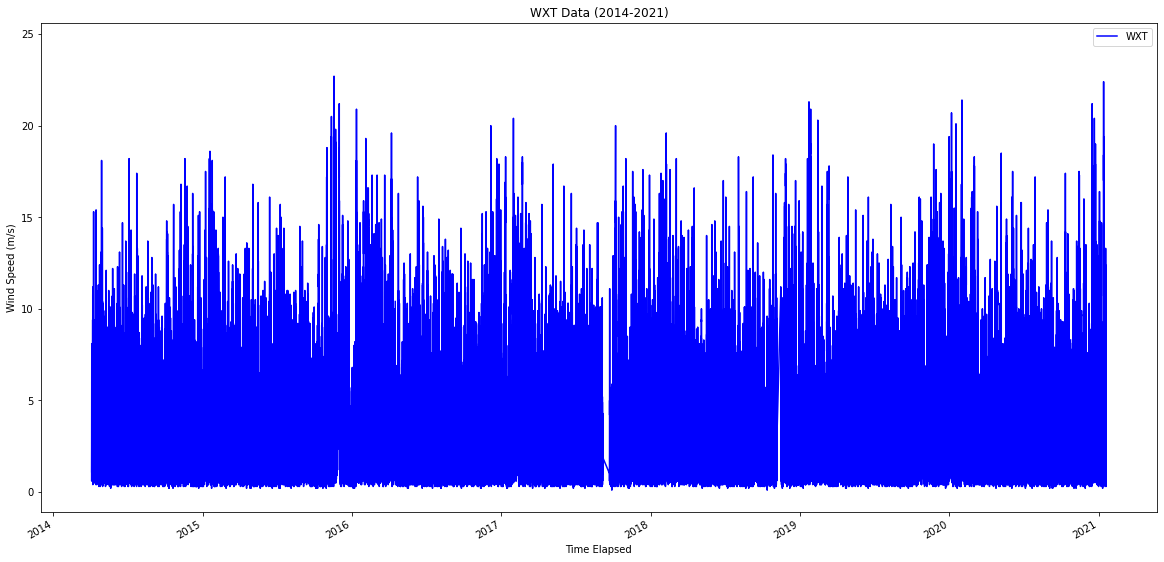

In [13]:
ax = df_wxt.plot(kind = 'line', x = 'datetime', y = 'wspd', color='blue', figsize = (20, 10), label = "WXT")
ax.set_xlabel("Time Elapsed")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("WXT Data (2014-2021)")

**CONVERTING SONIC DATA INTO WXT TIME STAMPS (5-MIN INTERVALS)**

For all the Sonic Data, convert into 5-minute intervals.

In [14]:
s = pd.Series(df_sonic.index // 300)
df_sonic = df_sonic[s.groupby(s).transform('count') == 300]
new_sonic = df_sonic.groupby(df_sonic.index // 300).agg({'datetime':'last', 'Spd':'mean', 'Dir':'mean'})
new_sonic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313306 entries, 0 to 313305
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  313306 non-null  object 
 1   Spd       313306 non-null  float64
 2   Dir       313306 non-null  float64
dtypes: float64(2), object(1)
memory usage: 9.6+ MB


**FULL SONIC RECORD:**

Graphing all of the Sonic Data we have.

Text(0.5, 1.0, 'Sonic Data (2018-2020)')

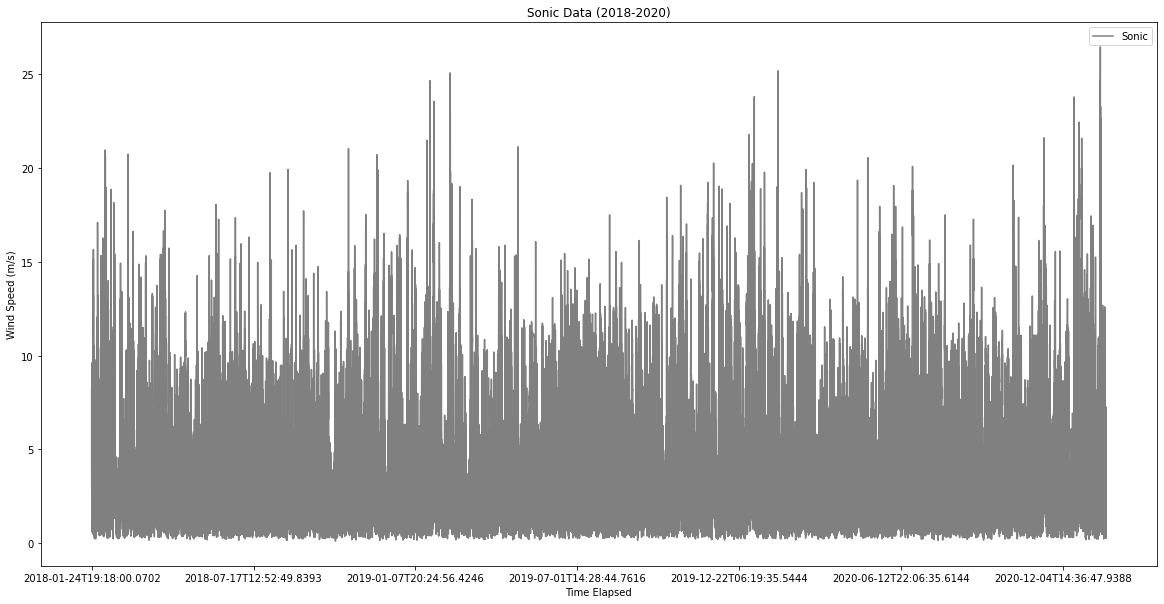

In [15]:
ax = new_sonic.plot(kind = 'line', x = 'datetime', y = 'Spd', color='gray', figsize = (20, 10), label = "Sonic")
ax.set_xlabel("Time Elapsed")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Sonic Data (2018-2020)")

**SORTING SONIC VALUES:**

We want to order this dataframe in descending order, putting all our max wind speeds at the top of the dataframe. It will go from greatest to least.

In [16]:
dfSonicSORT = new_sonic.sort_values('Spd', ascending=False)
dfSonicSORT.head(20)

,datetime,Spd,Dir
311488,2021-01-13T12:09:27.3671,26.421600,244.606667
311479,2021-01-13T11:24:27.1811,25.398900,246.950000
211979,2020-02-01T20:47:19.1632,25.147167,246.093333
110717,2019-02-14T02:41:32.8930,25.036200,236.613333
311486,2021-01-13T11:59:27.3269,24.776333,242.510000
104518,2019-01-23T13:41:41.9772,24.626333,239.760000
311461,2021-01-13T09:54:26.8097,24.606333,248.186667
311480,2021-01-13T11:29:27.2014,24.572500,246.850000
311477,2021-01-13T11:14:27.1403,24.496400,248.506667
211988,2020-02-01T21:32:19.3535,24.486467,244.936667


**GETTING THE TENTH PERCENTILE:**

Next thing we want to do is from our sorted Dataframe (Highest Wind Spds at Top, Lowest at Bottom), we want to take the top 10th percent of our data. So we specify how much of it we want to keep ($n_2$), and then we take that top 10%.

In [17]:
#Want top 10th percentile
n2 = 10
#Dataframe Sonic Top Ten:
dfSonicTT = dfSonicSORT.head(int(len(dfSonicSORT)*(n2/100)))
dfSonicTT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31330 entries, 311488 to 87380
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  31330 non-null  object 
 1   Spd       31330 non-null  float64
 2   Dir       31330 non-null  float64
dtypes: float64(2), object(1)
memory usage: 979.1+ KB


**CHECKING FOR CORRECTNESS:**

One other way to make sure I took the Top Tenth of all Sonic data is to plot my Top Ten Dataframe against the Full Sonic Dataframe. $\checkmark$

Text(0.5, 1.0, 'Top Tenth Percentile for Sonic vs. All Sonic')

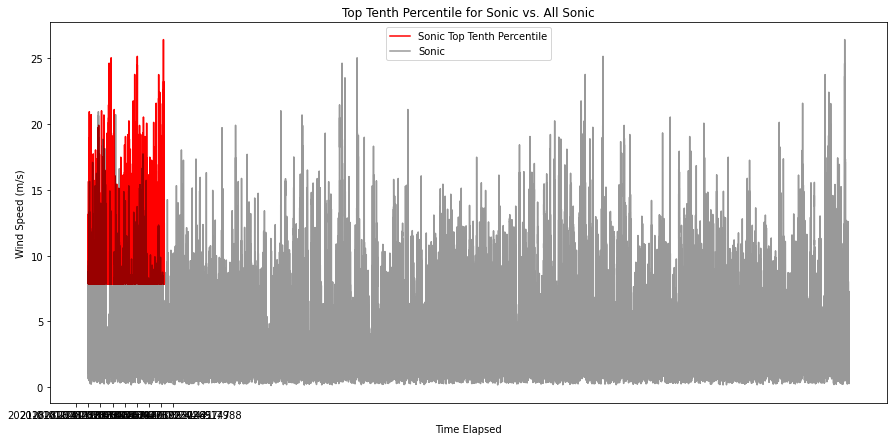

In [18]:
dfSTT = dfSonicTT.sort_values('datetime', ascending=True)
ax = dfSTT.plot(kind = 'line', x = 'datetime', y = 'Spd', color='red', figsize = (15, 7), label = "Sonic Top Tenth Percentile")
new_sonic.plot(kind = 'line', x = 'datetime', y = 'Spd', color = 'black', alpha = 0.4, figsize = (15, 7), ax = ax, label = "Sonic")
ax.set_xlabel("Time Elapsed")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Top Tenth Percentile for Sonic vs. All Sonic")

The axis looks a little weird, but we can clearly see this is taking the top tenth of our max wind speed data for Sonic. It's taking the top wind speeds that cover 10% of our full data. $\checkmark$

**AVERAGING SONIC DATA (24-HOUR MEAN):**

Now let's try and smooth out our data and look at SONIC data graphed over a period of a day. We know SONIC files are in 5-minute intervals, and there are 288 5-minute intervals in the day. So we need to combine the mean over each consecutive $288$ data points to make one point for a day.

In [19]:
new_sonic['datetime'] =  pd.to_datetime(new_sonic['datetime'])
df_SC = new_sonic.groupby(new_sonic.datetime.dt.date).mean()
df_SC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 2018-01-24 to 2021-01-19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Spd     1092 non-null   float64
 1   Dir     1092 non-null   float64
dtypes: float64(2)
memory usage: 25.6+ KB


Text(0.5, 1.0, 'Daily Average for Sonic')

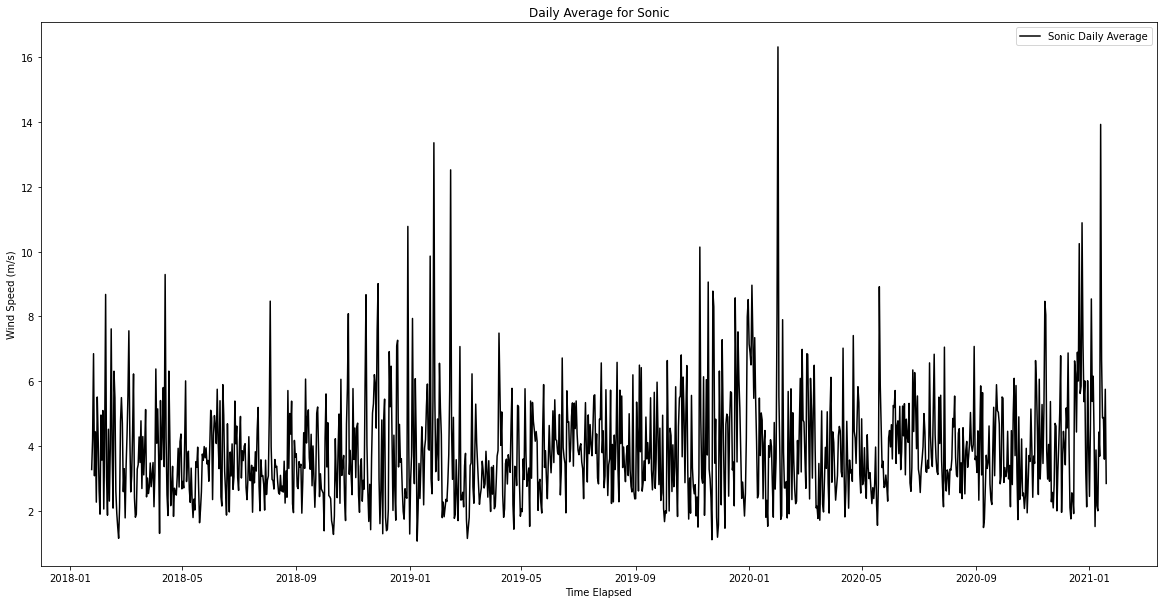

In [20]:
ax = df_SC.plot(kind = 'line', y = 'Spd', color='black', figsize = (20, 10), label = "Sonic Daily Average")
ax.set_xlabel("Time Elapsed")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Daily Average for Sonic")

**OVERLAYED DATA FOR SONIC AND WXT:**

Let's overlay the values for WXT and SONIC.

The first thing we need to do is parse out WXT, and only take the records from 2018-2021.

In [21]:
start_date = '01-01-2018'
end_date = '02-01-2021'
mask = (df_wxt['datetime'] > start_date) & (df_wxt['datetime'] <= end_date)

In [22]:
df1 = df_wxt.loc[mask]
df1

,datetime,wdir,wspd,wspd_max,tdry,rh,pres,rain_accum,batt
387755,2018-01-01 00:04:49.059500,140.0,0.9,2.0,-11.1,83.4,815.5,6.3,13.9
387756,2018-01-01 00:09:49.066900,190.0,1.2,2.3,-10.8,83.2,815.5,6.3,13.9
387757,2018-01-01 00:14:49.070300,144.0,1.1,1.9,-10.8,83.3,815.5,6.3,13.9
387758,2018-01-01 00:19:49.082000,120.0,1.3,2.6,-11.0,84.7,815.6,6.3,13.9
387759,2018-01-01 00:24:49.087500,98.0,0.9,2.0,-11.2,82.7,815.6,6.3,13.9
...,...,...,...,...,...,...,...,...,...
704284,2021-01-19 19:15:29.690600,135.0,2.8,6.1,-0.2,38.3,817.2,0.0,13.9
704285,2021-01-19 19:20:29.690300,129.0,2.0,4.3,-0.2,38.3,817.2,0.0,13.9
704286,2021-01-19 19:25:29.689600,114.0,2.7,6.5,0.3,37.7,817.0,0.0,13.9
704287,2021-01-19 19:30:29.685000,151.0,3.2,5.7,-0.1,37.8,817.0,0.0,13.9


Now, df1 holds all WXT data between 2018 and 2021. Now we can graph this onto Sonic.

In [23]:
new_sonic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313306 entries, 0 to 313305
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  313306 non-null  datetime64[ns]
 1   Spd       313306 non-null  float64       
 2   Dir       313306 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 9.6 MB


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316534 entries, 387755 to 704288
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   datetime    316534 non-null  datetime64[ns]
 1   wdir        306093 non-null  float64       
 2   wspd        306093 non-null  float64       
 3   wspd_max    306093 non-null  float64       
 4   tdry        316534 non-null  float64       
 5   rh          316534 non-null  float64       
 6   pres        316534 non-null  float64       
 7   rain_accum  316534 non-null  float64       
 8   batt        316534 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 24.1 MB


Text(0.5, 1.0, 'WXT Data vs. Sonic Data (2018-2021)')

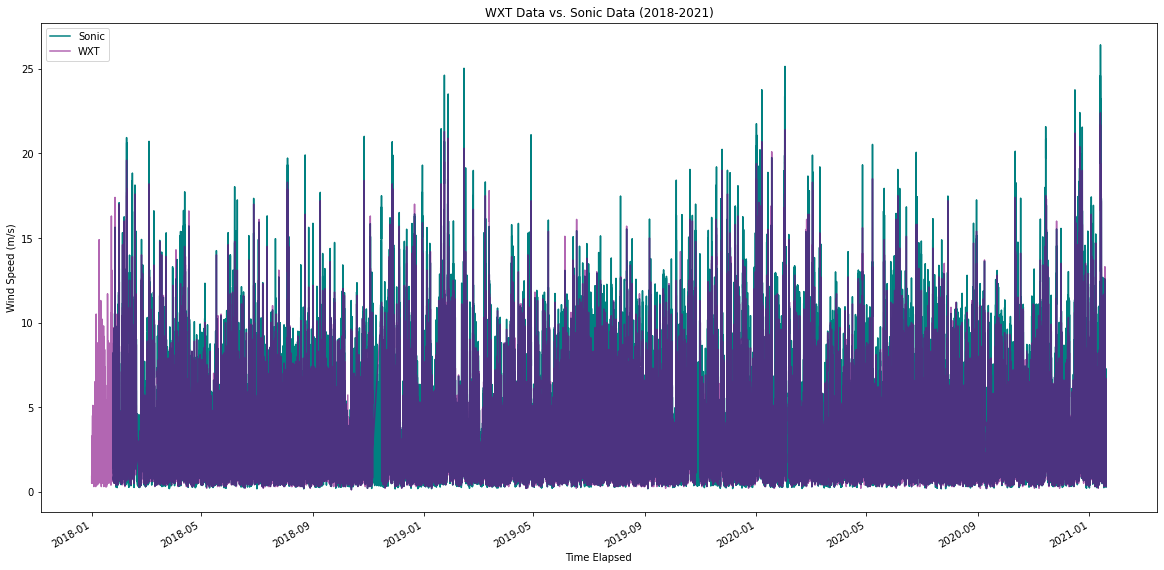

In [25]:
ax = new_sonic.plot(kind = 'line', x = 'datetime', y = 'Spd', color='teal', figsize = (20, 10), label = "Sonic")
df1.plot(kind = 'line', x = 'datetime', y = 'wspd', color='purple', alpha=0.6, figsize = (20, 10), label = "WXT", ax=ax)
ax.set_xlabel("Time Elapsed")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("WXT Data vs. Sonic Data (2018-2021)")

Now let's overlay the Daily Average plots for Sonic and WXT!

Text(0.5, 1.0, 'Daily Averages for Sonic vs. WXT')

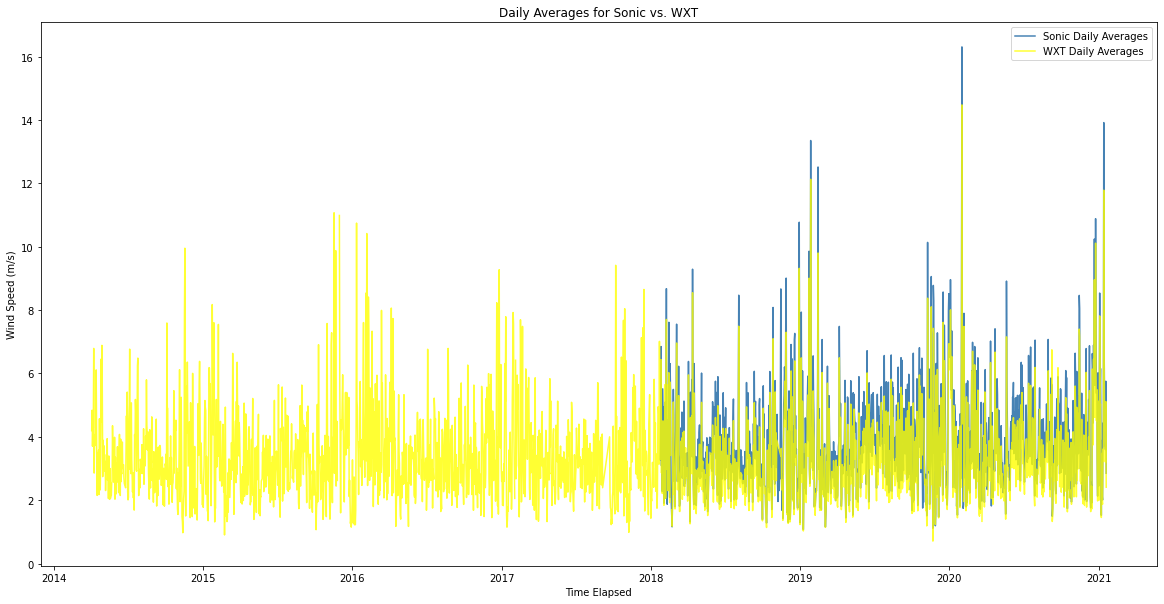

In [36]:
ax = df_SC.plot(kind = 'line', y = 'Spd', color='steelblue', figsize = (20, 10), label = "Sonic Daily Averages")
df_new.plot(kind = 'line', y = 'wspd', color = 'yellow', alpha = 0.8, figsize = (20, 10), ax = ax, label = "WXT Daily Averages")
ax.set_xlabel("Time Elapsed")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Daily Averages for Sonic vs. WXT")

The Sonic record doesn't begin until 2018, hence it doesn't show up until later along the timeline. We can zoom into just the datetime since 2018 for WXT as well.

**WIND ROSES**

We will create Wind Roses for the following data.

$\textbf{1) ALL WXT DATA}$

Text(0.5, 1.0, 'Wind Rose for all WXT Data')

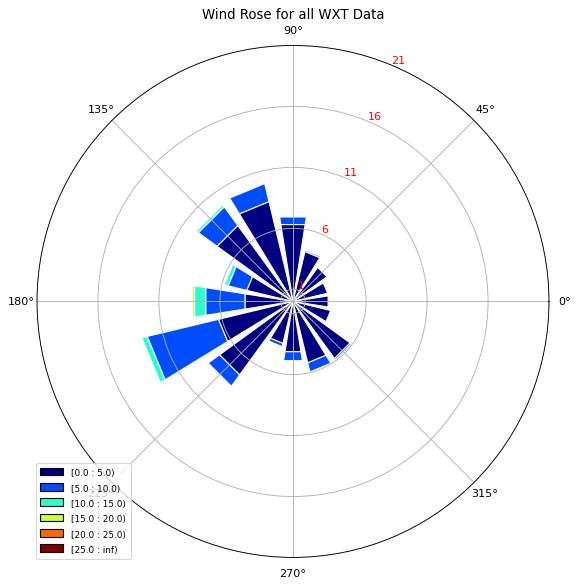

In [29]:
ax = WindroseAxes.from_ax()
bins_range = np.arange(0, 30, 5)
ax.bar(df_wxt['wdir'], df_wxt['wspd'], normed=True, opening=0.8, edgecolor='white', bins=bins_range)
ax.set_legend()
ax.set_yticks(np.arange(1, 25, step=5))
ax.set_yticklabels(np.arange(1, 25, step=5), color='r')
ax.set_title('Wind Rose for all WXT Data')

$\textbf{2) ALL SONIC DATA}$

Text(0.5, 1.0, 'Wind Rose for all Sonic Data')

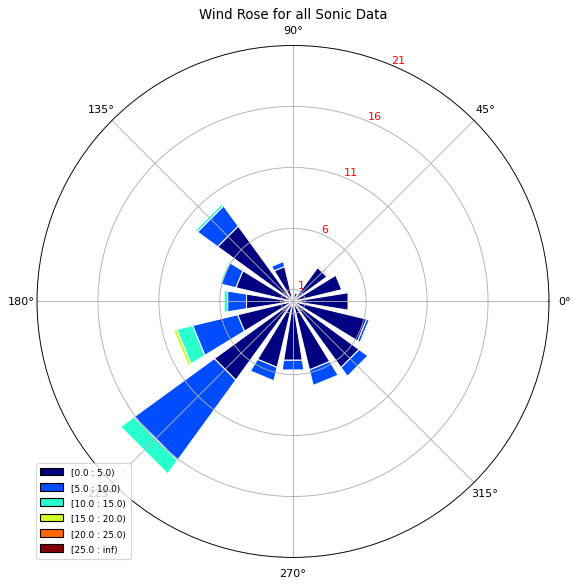

In [30]:
ax = WindroseAxes.from_ax()
bins_range = np.arange(0, 30, 5)
ax.bar(new_sonic['Dir'], new_sonic['Spd'], normed=True, opening=0.8, edgecolor='white', bins=bins_range)
ax.set_legend()
ax.set_yticks(np.arange(1, 25, step=5))
ax.set_yticklabels(np.arange(1, 25, step=5), color='r')
ax.set_title('Wind Rose for all Sonic Data')

$\textbf{3) TOP TENTH PERCENTILE OF SONIC DATA}$

Text(0.5, 1.0, 'Top Tenth Percentile of Sonic Data')

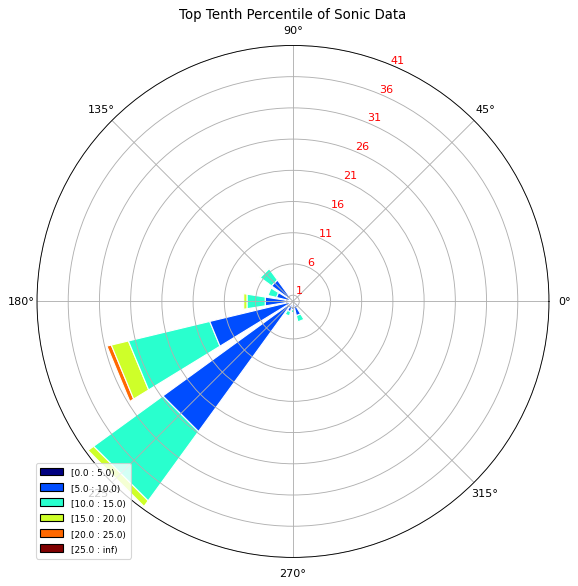

In [33]:
ax = WindroseAxes.from_ax()
bins_range = np.arange(0, 30, 5)
ax.bar(dfSTT['Dir'], dfSTT['Spd'], normed=True, opening=0.8, edgecolor='white', bins=bins_range)
ax.set_legend()
ax.set_yticks(np.arange(1, 45, step=5))
ax.set_yticklabels(np.arange(1, 45, step=5), color='r')
ax.set_title('Top Tenth Percentile of Sonic Data')

$\textbf{4) TOP TENTH PERCENTILE OF WXT DATA}$

Text(0.5, 1.0, 'Top Tenth Percentile of WXT Data')

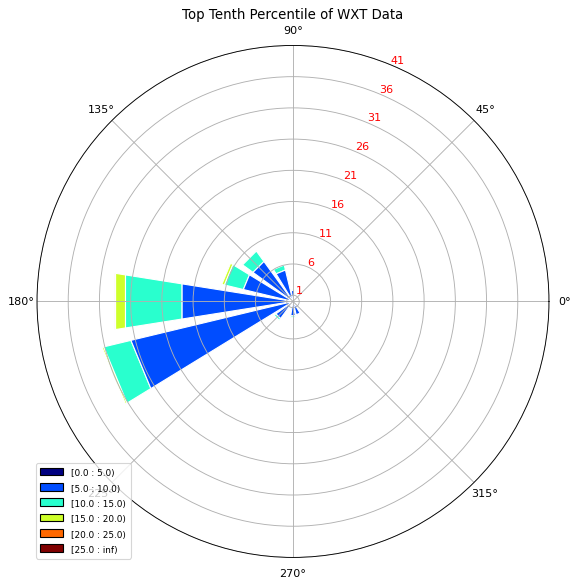

In [35]:
ax = WindroseAxes.from_ax()
bins_range = np.arange(0, 30, 5)
ax.bar(dfSWXT['wdir'], dfSWXT['wspd'], normed=True, opening=0.8, edgecolor='white', bins=bins_range)
ax.set_legend()
ax.set_yticks(np.arange(1, 45, step=5))
ax.set_yticklabels(np.arange(1, 45, step=5), color='r')
ax.set_title('Top Tenth Percentile of WXT Data')